In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Onda plana en dirección arbitraria

$\Large{E_r=E_{0}*e^{jkr}}$ 

$k=\Large{\frac{2*\pi}{\lambda}(\alpha*x+\beta*y+\gamma*z)}$


$\Large{E_r=E_{0}*exp[{j*\frac{2*\pi}{\lambda}(\alpha*x+\beta*y)]}}$  Omitiendo la dirección Z

In [9]:
#Función Que genera una onda plana 

def PlaneWave(M,N,AnglX,AnglY,dx,dy,wavelength):
  #Centros de la imagen
    Mcen = int(M/2)
    Ncen = int(N/2)
   #Arreglos de x y y
    x=np.arange(-Mcen,Mcen+1)
    y=np.arange(-Ncen,Ncen+1)
   #Malla de la matriz
    X, Y = np.meshgrid(x,y)
   #Vector de una onda
    k= 2*np.pi/wavelength
    #Angulos en X y Y
    Ax=np.cos(AnglX)
    Ay=np.cos(AnglY)

    wave = np.exp(1j*k*(Ax*X*dx+Ay*Y*dy))

    return wave

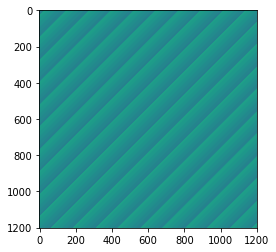

In [42]:
plan= PlaneWave(1200,1200,0.4,0.4,0.1,0.10,0.650)
plt.imshow(np.angle(plan))
plt.show()

### Onda Esferica ideal

$\huge{\psi(r,t)= (\frac{A}{r}e^{ik(r\pm ct)}}$

In [33]:
#Función que genera una onda esferica ideal

def spherical_wave(M,N,dx,dy,z,wavelength):
    #Centros de la imagen
    Mcen = int(M/2)
    Ncen = int(N/2)
   #Arreglos de x y y
    x=np.arange(-Mcen,Mcen+1)
    y=np.arange(-Ncen,Ncen+1)
    #Malla de la matriz
    X, Y = np.meshgrid(x,y)
    #Vector de una onda
    k= 2*np.pi/wavelength

    r=np.sqrt(z**2 + (X*dx)**2 + (Y*dy)**2)

    sph=np.exp(1j*k*r)/r

    return sph

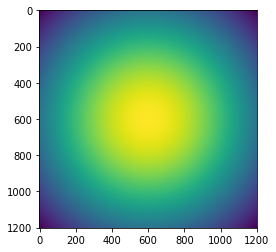

In [43]:
esf1= spherical_wave(1200,1200,0.1,0.1,90,0.650)
plt.imshow(np.abs(esf1))
plt.show()

### Función de tranferencia aproximada Fresnel

$\huge{U(x,y,z)=F^{-1}\left\lbrace F[U_{0}]F[\frac{e^{ikz}}{i\lambda z}*e^{i\frac{k}{2z}(x^2+y^2)}] \right\rbrace}$

$ \huge{H(f_x,f_y)=e^{ikz}e^{-i\pi \lambda z(f_x^{2}+f_y^{2})}}$

In [44]:
def T_Aprox(T_f,dx,dy,z,wavelength):
    #Contenido frecuencial de la imagen (transformada de fourier)
    T_freq=np.fft.fftshift(np.fft.fft2(T_f))
    #Se define el espacio de coordenadas según la imagen que hace de U_0
    N,M= np.shape(T_f)
    x=np.arange(-int(N/2),int(N/2)+1)
    y=np.arange(-int(M/2),int(M/2)+1)
    X, Y=np.meshgrid(x,y)

    #dimensiones de mundo en frecuencias
    fx=X*(1/(N*dx))
    fy=Y*(1/(M*dy))

    #vector de onda Y constantes de e^{ikz} .....
    k= 2*np.pi/wavelength
    C1=np.exp(1j*k*z)
    C2=-1j*np.pi*wavelength*z

    #Tranformada H(f_x,f_y)
    Tran=C1*np.exp(C2*((fx**2)+(fy**2)))

    #U(x,y,z)
    U_resultante=Tran*T_freq

    return U_resultante

